<a href="https://colab.research.google.com/github/chloe-nguyenminh/Movie_Genre_Detector_Project/blob/main/notebooks/detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import sklearn
from keras.models import load_model
import keras.utils as image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/')
sys.path.append('/content/drive/MyDrive/Summer_2023/Models/Poster_Models/Test-images/')
sys.path = list(dict.fromkeys(sys.path))
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Summer_2023/Models/Poster_Models/',
 '/content/drive/MyDrive/Summer_2023/Models/Poster_Models/Test-images/']

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Summer_2023/Models/Poster_Models/',
 '/content/drive/MyDrive/Summer_2023/Models/Poster_Models/Test-images/']

In [ ]:
def find_genre(test_path, model_path):
    model = load_model(model_path)
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    column_lookups = pd.read_csv(sys.path[-2] + "Encoded_data_column_lookup.csv", delimiter=" ")
    classes = np.asarray(column_lookups.iloc[1:29, 0])

    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(prob[0][top_3[i]]))
    plt.imshow(img)

In [ ]:
# Give the list of every genre prediction with probability higher than 0.1
def find_major_genres(test_path, model_path, threshold= 0.100):
    model = load_model(model_path)
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    genres = np.argsort(prob[0])[::-1]

    column_lookups = pd.read_csv(sys.path[-2] + "Encoded_data_column_lookup.csv", delimiter=" ")
    classes = np.asarray(column_lookups.iloc[1:29, 0])

    dict1 = {'Genre': [], "Percentage": []}
    for i in range(len(genres)):
        if prob[0][genres[i]] >= threshold:
          dict1['Genre'].append(classes[genres[i]])
          dict1['Percentage'].append(prob[0][genres[i]])
          # print("{}".format(classes[genres[i]])+" ({:.3})".format(prob[0][genres[i]]))
        else:
          break
    df = pd.DataFrame.from_dict(dict1)
    print(df)
    return df
    # print(dict1)
    plt.imshow(img)

In [ ]:
output_df = find_major_genres(sys.path[-1] + "gladiator.png", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 367ms/step
         Genre  Percentage
0       Family    0.395909
1        Crime    0.317000
2        Adult    0.211365
3    Animation    0.161368
4        Music    0.151800
5  Documentary    0.122259
6        Drama    0.118743
7          War    0.113907
8        Short    0.100072


In [ ]:
output_df.to_csv(sys.path[-2] + 'gladiator' + '_output.csv')

1/1 [==============================] - 0s 137ms/step
Family (0.558)
Drama (0.189)
Crime (0.157)
War (0.142)
Music (0.116)
Sci-Fi (0.111)
Documentary (0.109)
Adult (0.108)


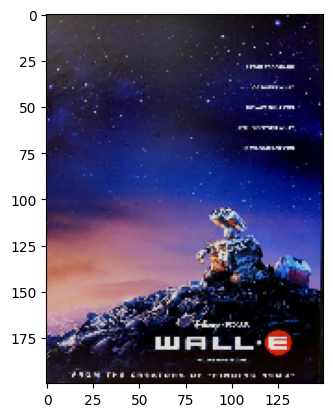

In [ ]:
find_major_genres(sys.path[-1] + "wall-e.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 221ms/step
Family (0.409)
Music (0.286)
War (0.261)


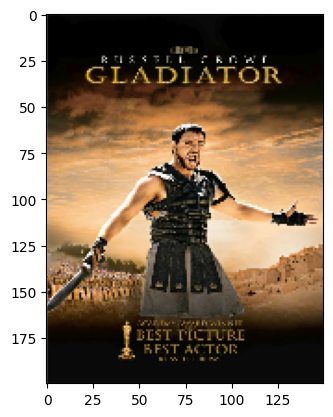

In [ ]:
find_genre(sys.path[-1] + "gladiator.png", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 242ms/step
Family (0.6)
Crime (0.378)
Sci-Fi (0.251)


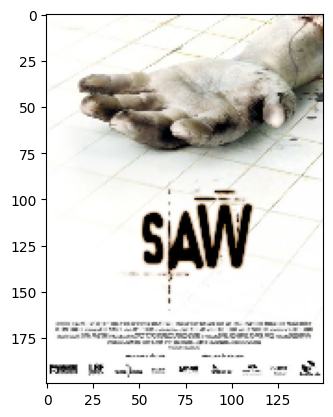

In [ ]:
find_genre(sys.path[-1] + "saw.png", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 144ms/step
Family (0.527)
War (0.226)
Music (0.191)


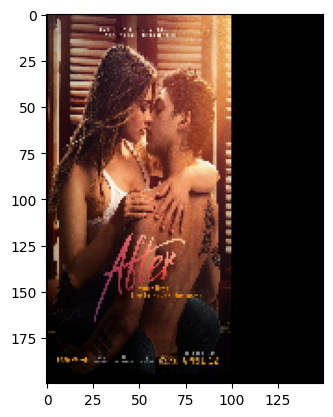

In [ ]:
find_genre(sys.path[-1] + "after.png", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 1s 849ms/step
Family (0.431)
Music (0.244)
War (0.236)


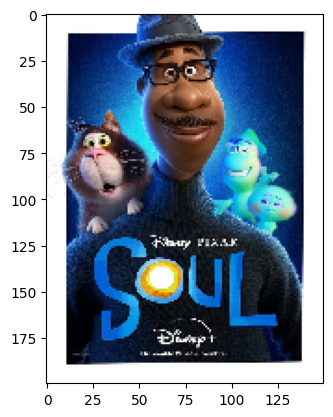

In [ ]:
find_genre(sys.path[-1] + "soul.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 234ms/step
Family (0.528)
War (0.264)
Music (0.216)


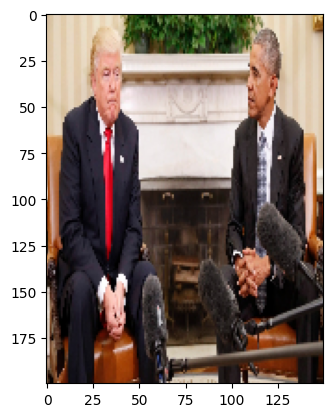

In [ ]:
find_genre(sys.path[-1] + "obama-trump.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 1s 521ms/step
Family (0.553)
Crime (0.429)
Sci-Fi (0.247)


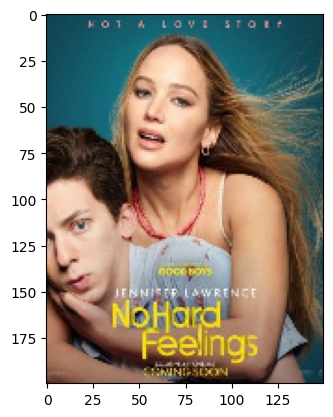

In [ ]:
find_genre(sys.path[-1] + "No-Hard-Feelings.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 133ms/step
Family (0.507)
Crime (0.252)
Adult (0.159)


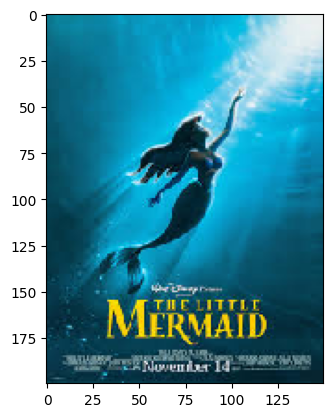

In [ ]:
find_genre(sys.path[-1] + "Ariel.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 181ms/step
Family (0.615)
Crime (0.308)
Sci-Fi (0.205)


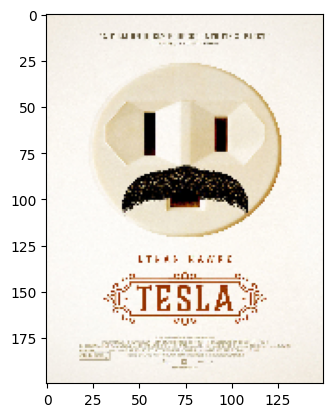

In [ ]:
find_genre(sys.path[-1] + "Tesla.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 132ms/step
Family (0.558)
Drama (0.189)
Crime (0.157)


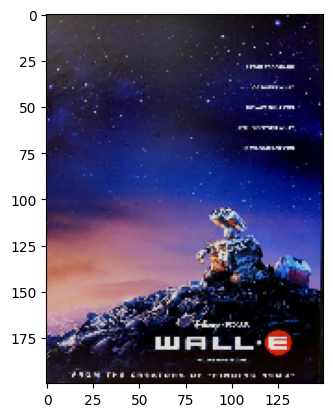

In [ ]:
find_genre(sys.path[-1] + "wall-e.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 222ms/step
Family (0.467)
Crime (0.339)
Adult (0.171)


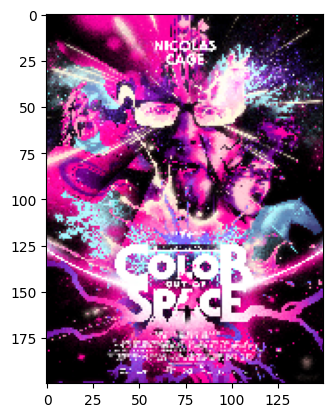

In [ ]:
find_genre(sys.path[-1] + "Color-Out-of-Space.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 225ms/step
Family (0.584)
Crime (0.312)
Sci-Fi (0.191)


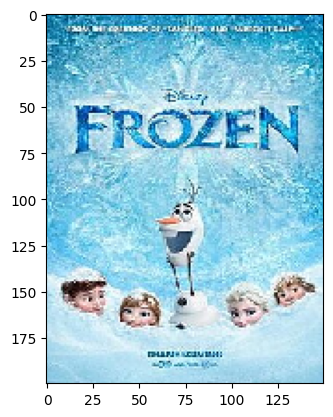

In [ ]:
find_genre(sys.path[-1] + "Frozen.jpg", sys.path[-2] + 'base-cnn-model.h5')

1/1 [==============================] - 0s 131ms/step
Family (0.526)
Crime (0.243)
Adult (0.153)


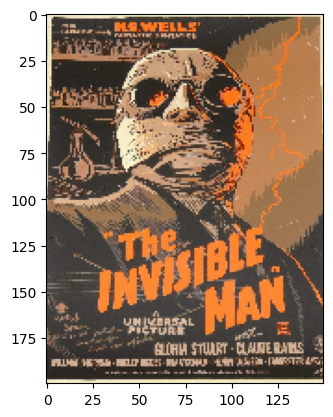

In [ ]:
find_genre(sys.path[-1] + "Invisible-Man.jpg", sys.path[-2] + 'base-cnn-model.h5')